## Fashion MNIST adatset Adaboost klasszifikáció 

### Adatok feltöltése

In [2]:
from google.colab import files

uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


### Adatok betöltése

In [0]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
test =  pd.read_csv('fashion-mnist_test.csv')

In [0]:
from sklearn.preprocessing import label_binarize

y=df['label']
y_bin = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9])
X=df.drop('label', axis=1)
X=X/255

y_test=test['label']
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
X_test=test.drop('label', axis=1)
X_test=X_test/255

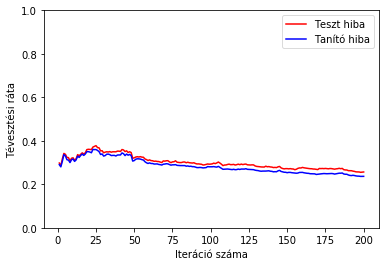

In [5]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier

n_estimators=200
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=n_estimators)
adaboost.fit(X,y)

fig = plt.figure()
ax = fig.add_subplot(111)


ada_err_test = np.zeros((n_estimators,))
for i, y_pred in enumerate(adaboost.staged_predict(X_test)):
    ada_err_test[i] = zero_one_loss(y_pred, y_test)

ada_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(adaboost.staged_predict(X)):
    ada_err[i] = zero_one_loss(y_pred, y)

ax.plot(np.arange(n_estimators) + 1, ada_err_test, label='Teszt hiba', color='red')
ax.plot(np.arange(n_estimators) + 1, ada_err, label='Tanító hiba', color='blue')

ax.set_ylim((0.0, 1.0))
ax.set_xlabel('Iteráció száma')
ax.set_ylabel('Tévesztési ráta')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

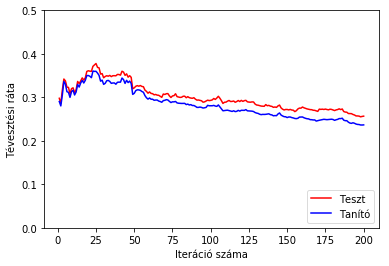

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_err_test, label='Teszt', color='red')
ax.plot(np.arange(n_estimators) + 1, ada_err, label='Tanító', color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('Iteráció száma')
ax.set_ylabel('Tévesztési ráta')

leg = ax.legend(loc='lower right')
leg.get_frame().set_alpha(0.7)

plt.show()

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

preds=adaboost.predict(X_test)
predsprob = adaboost.predict_proba(X_test)

print(accuracy_score(y_test, preds))

0.7433


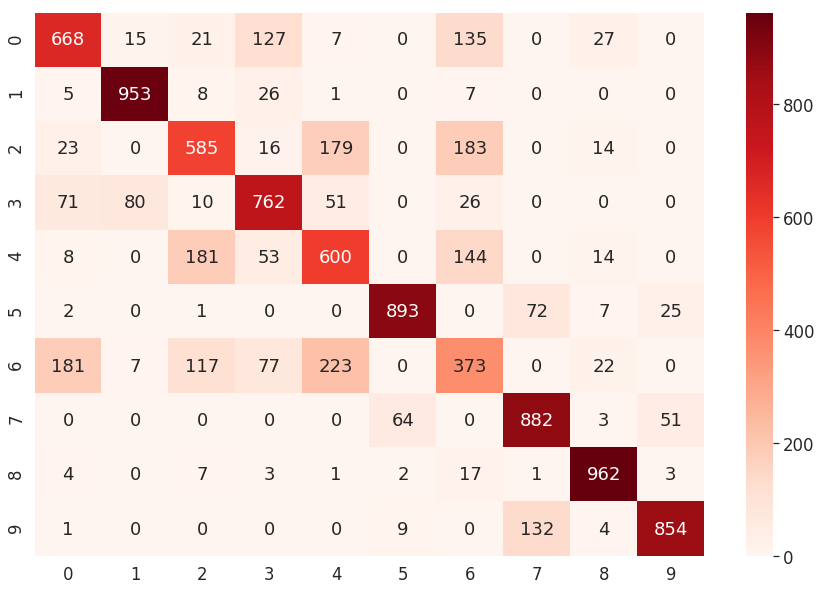

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sn.set(font_scale=1.5)
sn.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d',cmap='Reds')

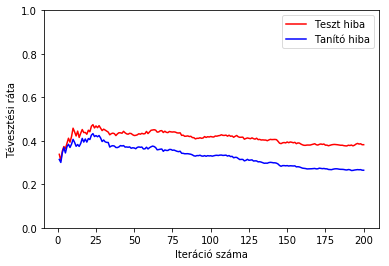

In [9]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
svd.fit(X)
X=svd.transform(X)

svd.fit(X_test)
X_test=svd.transform(X_test)

n_estimators=200
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=n_estimators)
adaboost.fit(X,y)

fig = plt.figure()
ax = fig.add_subplot(111)


ada_err_test = np.zeros((n_estimators,))
for i, y_pred in enumerate(adaboost.staged_predict(X_test)):
    ada_err_test[i] = zero_one_loss(y_pred, y_test)

ada_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(adaboost.staged_predict(X)):
    ada_err[i] = zero_one_loss(y_pred, y)

ax.plot(np.arange(n_estimators) + 1, ada_err_test, label='Teszt hiba', color='red')
ax.plot(np.arange(n_estimators) + 1, ada_err, label='Tanító hiba', color='blue')

ax.set_ylim((0.0, 1.0))
ax.set_xlabel('Iteráció száma')
ax.set_ylabel('Tévesztési ráta')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

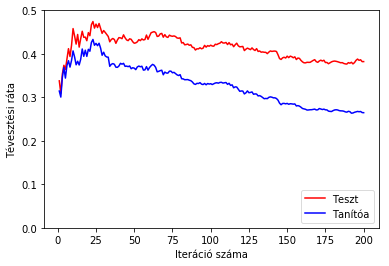

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_err_test, label='Teszt', color='red')
ax.plot(np.arange(n_estimators) + 1, ada_err, label='Tanítóa', color='blue')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('Iteráció száma')
ax.set_ylabel('Tévesztési ráta')

leg = ax.legend(loc='lower right')
leg.get_frame().set_alpha(0.7)

plt.show()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

preds=adaboost.predict(X_test)
predsprob = adaboost.predict_proba(X_test)

print(accuracy_score(y_test, preds))

0.6542


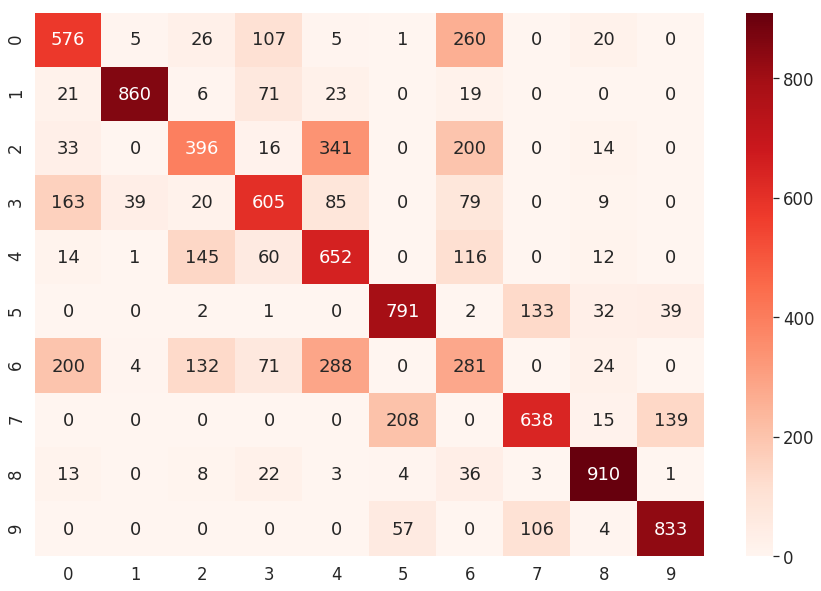

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sn.set(font_scale=1.5)
sn.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d',cmap='Reds')

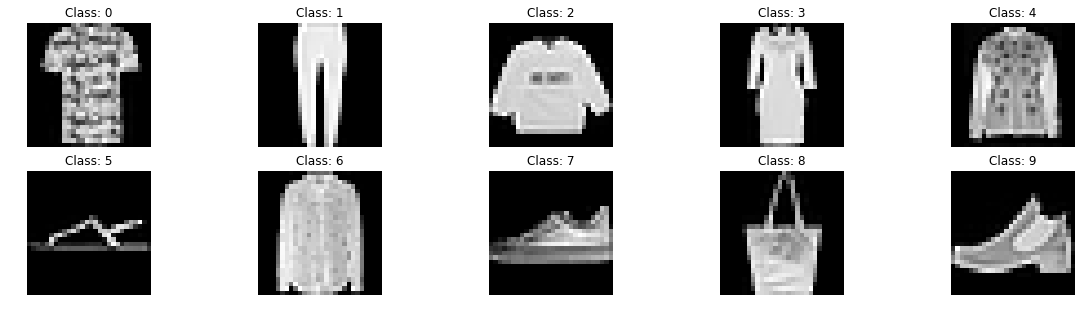

In [0]:
import numpy as np
import csv
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X[y==i].iloc[0,:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()